# Statistical Machine Learning AM41ML

## Week 5 Random Trees and Random Forest

# The objective of this fifth lab is to solve a classification problem using random trees

## Task 1 a
Construct your own artificial dataset. The dataset is compossed by two Normally distributed clusters with 100 elements each, one centered at
$\boldsymbol{\mu}_0$ and covariance matrix $\boldsymbol{\Sigma}_0$, given the label $t=0$ and other centered at
$\boldsymbol{\mu}_1$ with covariance matrix $\boldsymbol{\Sigma}_1$, given the label  $t=1$.

## Task 1 b
Mak a 3d plot of your data set.

## Task 1 c
Merge the coordenates and labels of both clusters and shuffle the combined data set. Plot the new data set.



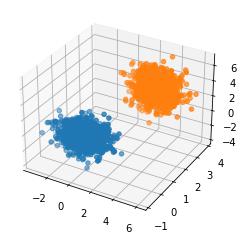

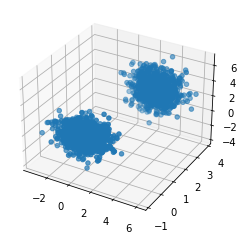

In [62]:
################
### Task 1 a ###
################

import numpy as np                        # Imports NumPy
def data(mx,my,mz,sx,sy,sz,N):            # Function data(mx,my,mz,sx,sy,sz) constructs N Gaussian deviates centered at (mx,my,mz) with 
                                          # std (sx,sy,sz)
    ex = np.random.normal(0, sx, N)       # Noise array in x
    ey = np.random.normal(0, sy, N)       # Noise array in y
    ez = np.random.normal(0, sz, N)       # Noise array in z
    x  = mx + ex                          # Array of the first coordinate
    y  = my + ey                          # Array of the second coordinate
    z  = mz + ez                          # Array of the third coordinate
    return(x,y,z)                         # The function returns two arrays of dim N.

x0 , y0 , z0 = data(0,0,0,1,.3,1,1000)   # First cluster
x1 , y1 , z1 = data(3,3,3,1,.3,1.22,1000) # Second cluster

################
### Task 1 b ###
################

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt          # Imports PyPlot          
ax = plt.axes(projection='3d')
ax.scatter3D(x0,y0,z0)                   # Simplest possible scatter points plot 
ax.scatter3D(x1,y1,z1)                   # Simplest possible scatter points plot 
plt.show()

################
### Task 1 c ###
################

import random as rd
t0  = np.zeros(1000)
t1  = np.ones(1000)
ind = np.arange(2000)
rd.shuffle(ind)
tta = np.concatenate((t0,t1))
xxa = np.concatenate((x0,x1))
yya = np.concatenate((y0,y1))
zza = np.concatenate((z0,z1))

tt = np.zeros(2000)
xx = np.zeros(2000)
yy = np.zeros(2000)
zz = np.zeros(2000)

for j in range(2000):
    tt[j] = tta[ind[j]]
    xx[j] = xxa[ind[j]]
    yy[j] = yya[ind[j]]
    zz[j] = zza[ind[j]]
    
ax = plt.axes(projection='3d')
ax.scatter3D(xx,yy,zz)                   # Simplest possible scatter points plot 
plt.show()


## Task 2 a
Plot the histograms of the projections of the data points onto the directions $x$, $y$ and $z$.
## Task 2 b
Adjust a bimodal Gaussian to each of the histograms, using scipy https://docs.scipy.org/doc/scipy/getting_started.html


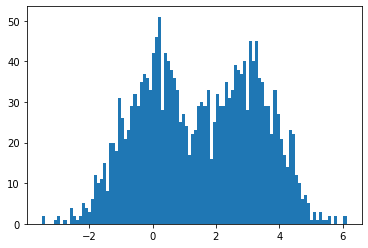

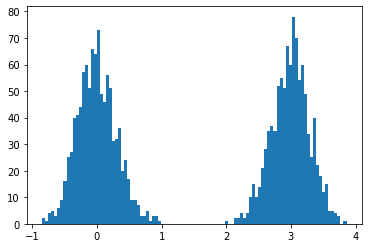

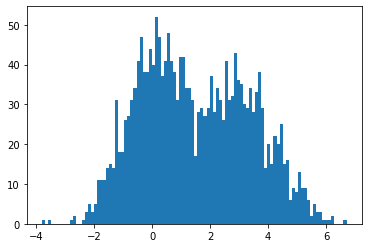

In [63]:
################
### Task 2 a ###
################

plt.hist(xx, bins = 100)
plt.show()
plt.hist(yy, bins = 100)
plt.show()
plt.hist(zz, bins = 100)
plt.show()


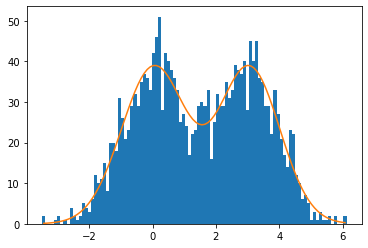

m0 =  0.04550425722524797
s0 =  1.0198767630688927
A0 =  38.71315946701644
m1 =  3.0542299113075524
s1 =  0.9622821025431533
A1 =  38.48558656347991


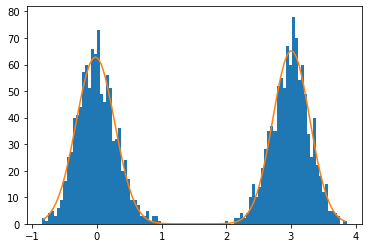

m0 =  -0.02326988097910055
s0 =  0.2986169748302193
A0 =  62.855050271674145
m1 =  3.005610907375602
s1 =  0.2852057360125666
A1 =  65.24958849810997


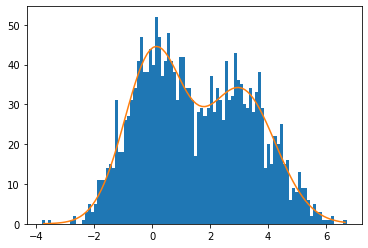

m0 =  0.05981666351108588
s0 =  1.0111841695141752
A0 =  42.870402542871126
m1 =  3.0422127692453667
s1 =  1.20015367503713
A1 =  33.61589801113367


In [65]:
################
### Task 2 b ###
################

from scipy.optimize import curve_fit

def gauss(x,mu,sigma,A):                                   # Returns the normal probability density at mu with std sigma at x scaled by A
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):                # Returns the bimodal Gaussian scaled by A1 and A2
    return gauss(x,mu1,sigma1,A1) + gauss(x,mu2,sigma2,A2)

cx , lx = np.histogram(xx , bins = 100)                    # counts and position of the bins from the histogram of xx
lx      = (lx[1:] + lx[:-1]) / 2                           # mid point between consecutive bins
cy , ly = np.histogram(yy , bins = 100)                    # counts and position of the bins from the histogram of yy
ly      = (ly[1:] + ly[:-1]) / 2                           # mid point between consecutive bins
cz , lz = np.histogram(zz , bins = 100)                    # counts and position of the bins from the histogram of zz
lz      = (lz[1:] + lz[:-1]) / 2                           # mid point between consecutive bins

expecx = (0,1,50,3  ,1,40)                                 # By inspection of the previously plot histograms
expecy = (0,1,40,3  ,1,50)
expecz = (0,1,60,2.5,1,40)

paramsx , covx = curve_fit(bimodal,lx,cx,expecx)           # fits a bimodal Gaussian to the histogram, first guess expecx
plt.hist(xx, bins = 100)                                   # plots the histogram and the fitting curve
plt.plot(lx,bimodal(lx,*paramsx))
plt.show()
print('m0 = ',paramsx[0])
print('s0 = ',paramsx[1])
print('A0 = ',paramsx[2])
print('m1 = ',paramsx[3])
print('s1 = ',paramsx[4])
print('A1 = ',paramsx[5])

paramsy , covy = curve_fit(bimodal,ly,cy,expecy)           # fits a bimodal Gaussian to the histogram, first guess expecy
plt.hist(yy, bins = 100)                                   # plots the histogram and the fitting curve
plt.plot(ly,bimodal(ly,*paramsy))
plt.show()
print('m0 = ',paramsy[0])
print('s0 = ',paramsy[1])
print('A0 = ',paramsy[2])
print('m1 = ',paramsy[3])
print('s1 = ',paramsy[4])
print('A1 = ',paramsy[5])

paramsz , covz = curve_fit(bimodal,lz,cz,expecz)           # fits a bimodal Gaussian to the histogram, first guess expecz
plt.hist(zz, bins = 100)                                   # plots the histogram and the fitting curve
plt.plot(lz,bimodal(lz,*paramsz))
plt.show()
print('m0 = ',paramsz[0])
print('s0 = ',paramsz[1])
print('A0 = ',paramsz[2])
print('m1 = ',paramsz[3])
print('s1 = ',paramsz[4])
print('A1 = ',paramsz[5])


## Task 3 a
Compute the probabilities $P_t(t=0,1)$, $p_x(x),\,p_y(y)$, and $p_z(z)$ (use the results from the previous task).

Observe that by construction we have as many 0s as 1s, therefore $P_t(t=0)=P_t(t=1)=\frac12$. The marginal probabilities for the components of the feature vectores are all mixture of Gaussians of the type $p_w(w)=\frac{A_0}{A_0+A_1} \mathcal{N}(w|\mu_0,\sigma_0^2)+\frac{A_1}{A_0+A_1} \mathcal{N}(w|\mu_1,\sigma_1^2)$ where the parameters can be obtained in the previous task.
## Task 3 b
Compute $H_t$, $H_x$, $H_y$, and $H_z$.

Hint: Observe that the joint marginal distributions $p(t,x)$, $p(t,y)$ and $p(t,z)$ are all of the form:
$$
p(t,w)=\frac{A_0}{A_0+A_1} \delta_{t,0}\mathcal{N}(w|\mu_0,\sigma_0^2)+\frac{A_1}{A_0+A_1}\delta_{t,1} \mathcal{N}(w|\mu_1,\sigma_1^2),
$$
therefore the conditional probabilities are:
$$
p(t|w)=\frac{A_t \mathcal{N}(w|\mu_t,\sigma_t^2)}{A_0\mathcal{N}(w|\mu_0,\sigma_0^2)+A_1\mathcal{N}(w|\mu_1,\sigma_1^2)}, 
$$
and the correspondent entropy conditional to $w$ is:
$$
H_w=\int_{-\infty}^{\infty}\mathrm{d}w\,p_w(w)\left(\sum_{t=0,1}p(t|w)\log_2\frac{1}{p(t|w)}\right)\\
H_w= \int_{-\infty}^{\infty}\mathrm{d}w\,p_w(w)\log_2p_w(w)+\sum_t\frac{A_t}{A_0+A_1}\log_2\left(\frac{\sigma_t(A_0+A_1)}{A_t}\right)+\frac12\log_22\pi+\frac1{2\log2}.
$$
To compute the remaining integral you may use scipy.integrate.


In [119]:
################
### Task 3 b ###
################

def entropy(ta):                                      # computes the entropy of a sequence of 0s and 1s 
    p1 = np.sum(ta) / len(ta)
    p0 = 1. - p1
    l2 = np.log(2.)
    H = (p0 * np.log(1 / p0) + p1 * np.log(1 / p1)) / l2 
    return(H)

C2 = 0.5 * (np.log(2. * np.pi) + 1.) / np.log(2.)

def partial(s0,s1,A0,A1):
    p0 = A0 / (A0 + A1)
    p1 = 1 - p0
    return((p0 * np.log(s0 / p0) + (p1 * np.log(s1 / p1))) / np.log(2.))

def gaussn(x,mu,sigma,A):                                  # Returns the normal probability density at mu with std sigma at x scaled by A
    return(A*exp(-(x-mu)**2/2/sigma**2)/np.sqrt(2*np.pi*sigma**2))

def bimodaln(x,mu1,sigma1,A1,mu2,sigma2,A2):               # Returns the bimodal Gaussian scaled by A1 and A2
    return gaussn(x,mu1,sigma1,A1) + gaussn(x,mu2,sigma2,A2)

m0x = paramsx[0]
s0x = paramsx[1]
A0x = paramsx[2]
m1x = paramsx[3]
s1x = paramsx[4]
A1x = paramsx[5]
a0x = A0x / (A0x + A1x)
a1x = 1. - a0x
m0y = paramsy[0]
s0y = paramsy[1]
A0y = paramsy[2]
m1y = paramsy[3]
s1y = paramsy[4]
A1y = paramsy[5]
a0y = A0y / (A0y + A1y)
a1y = 1. - a0y
m0z = paramsz[0]
s0z = paramsz[1]
A0z = paramsz[2]
m1z = paramsz[3]
s1z = paramsz[4]
A1z = paramsz[5]
a0z = A0z / (A0z + A1z)
a1z = 1. - a0z

import scipy.integrate as integrate

Ht = entropy(tt)
Hx = integrate.quad(lambda x: bimodaln(x,m0x,s0x,a0x,m1x,s1x,a1x) * np.log(bimodaln(x,m0x,s0x,a0x,m1x,s1x,a1x)),-10,10)[0]
Hx = Hx / np.log(2) + partial(s0x,s1x,a0x,a1x) + C2
print('Information Gain Feature 1 = ',Ht-Hx)
Hy = integrate.quad(lambda x: bimodaln(x,m0y,s0y,a0y,m1y,s1y,a1y) * np.log(bimodaln(x,m0y,s0y,a0y,m1y,s1y,a1y)),-10,10)[0]
Hy = Hy / np.log(2) + partial(s0y,s1y,a0y,a1y) + C2
print('Information Gain Feature 2 = ',Ht-Hy)
Hz = integrate.quad(lambda x: bimodaln(x,m0z,s0z,a0z,m1z,s1z,a1z) * np.log(bimodaln(x,m0z,s0z,a0z,m1z,s1z,a1z)),-10,10)[0]
Hz = Hz / np.log(2) + partial(s0z,s1z,a0z,a1z) + C2
print('Information Gain Feature 3 = ',Ht-Hz)


Information Gain Feature 1 =  0.7675026697202796
Information Gain Feature 2 =  0.9999995371498378
Information Gain Feature 3 =  0.6941933334430086


## Task 4 a
Perform the partition by considering the feature with the smallest conditional entropy.
## Task 4 b
Proceed in the same way with each one of the children partitions until you finish with all possible features.


In [124]:
################
### Task 4 a ###
################

Ymed = a0y * m0y + a1y * m1y
tn   = np.zeros(2000)
ee   = 0.
for j in range(2000):
    if yy[j] > Ymed :
        tn[j] = 1.
    ee = ee + np.abs(tn[j]-tt[j])
ee = ee / 2000

print(ee)


0.0
